# User Availability

In [5]:
import pandas as pd

# load data
Comments = pd.read_csv('../../160-Stackoverflow-Data/100000_rows_[168_MB]/Comments.csv')
Posts = pd.read_csv('../../160-Stackoverflow-Data/100000_rows_[168_MB]/Posts.csv')

# data preprocessing
Comments['CreationDate'] = pd.to_datetime(Comments['CreationDate'], format="%Y-%m-%dT%H:%M:%S")
Posts['CreationDate'] = pd.to_datetime(Posts['CreationDate'], format="%Y-%m-%dT%H:%M:%S")


def user_avail(user_id):
    """
    :param user_id: int - userId
    :return: pd.Series - frequency of user activities
    """
    user_questions_answers = Posts.loc[(Posts.OwnerUserId == user_id) & 
                                       ((Posts.PostTypeId == 1) | (Posts.PostTypeId == 2)), 
                                       ['CreationDate']]
    user_comments = Comments.loc[Comments.UserId == user_id, ['CreationDate']]
    user_activities = user_questions_answers.append(user_comments)
    return user_activities['CreationDate'].dt.hour.value_counts()

[Text(0,0.5,'Frequency'),
 Text(0.5,0,'Hour of the Day'),
 Text(0.5,1,'Active Hours for User 23')]

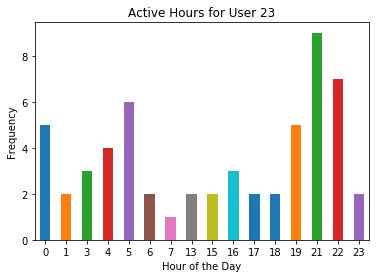

In [6]:
## example
user23_avail = user_avail(3434)
ax = user23_avail.sort_index().plot.bar()
ax.set_xticklabels(labels=user23_avail.sort_index().index, rotation=0, fontsize=10)
ax.set(xlabel='Hour of the Day', ylabel='Frequency', 
        title='Active Hours for User 23')